In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plot import lines_plot, columnX, plot_ccf_sm, cross_plots
from get_df import get_data_for_ml,keep_cols, get_data, get_dfs_for_ml
from statsmodels.tsa.api import VAR

In [2]:
df,df_just_stocastic = get_dfs_for_ml()


/home/joaoholz/Documents/LSTAT/joao/trabalho2/get_df.py:29: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df.date_time.dt.weekofyear


In [3]:
variables = df_just_stocastic.iloc[:,1:]
def divide_ts(data,perc = 0.8):
    value = int((data.shape)[0]*0.8)
    return data.iloc[:value],data.iloc[value:]
x,y = divide_ts(variables)
model = VAR(variables)
fit = model.fit(maxlags=8)
fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 31, Jan, 2023
Time:                     17:09:39
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                  -0.330628
Nobs:                     36820.0    HQIC:                 -0.351451
Log likelihood:          -202200.    FPE:                   0.696874
AIC:                    -0.361150    Det(Omega_mle):        0.694382
--------------------------------------------------------------------
Results for equation A613
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.026105         0.004787            5.454           0.000
L1.A613         0.457189         0.005224           87.514           0.000
L1.A614         0.000973         0.005114            0.190           0.849
L1.A634   

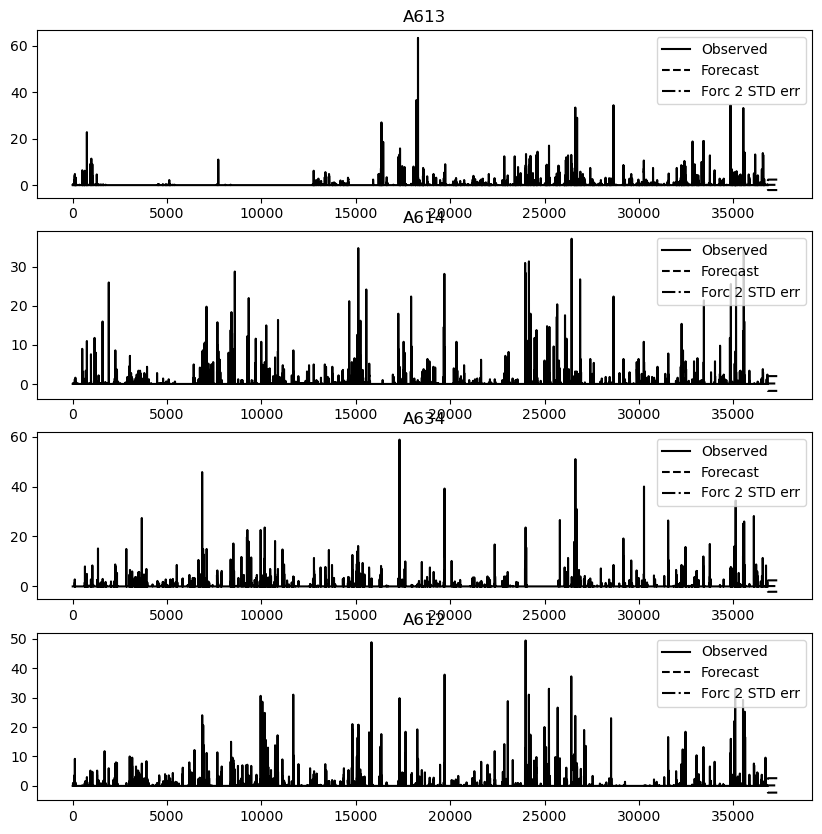

In [76]:
_ = fit.plot_forecast(500)

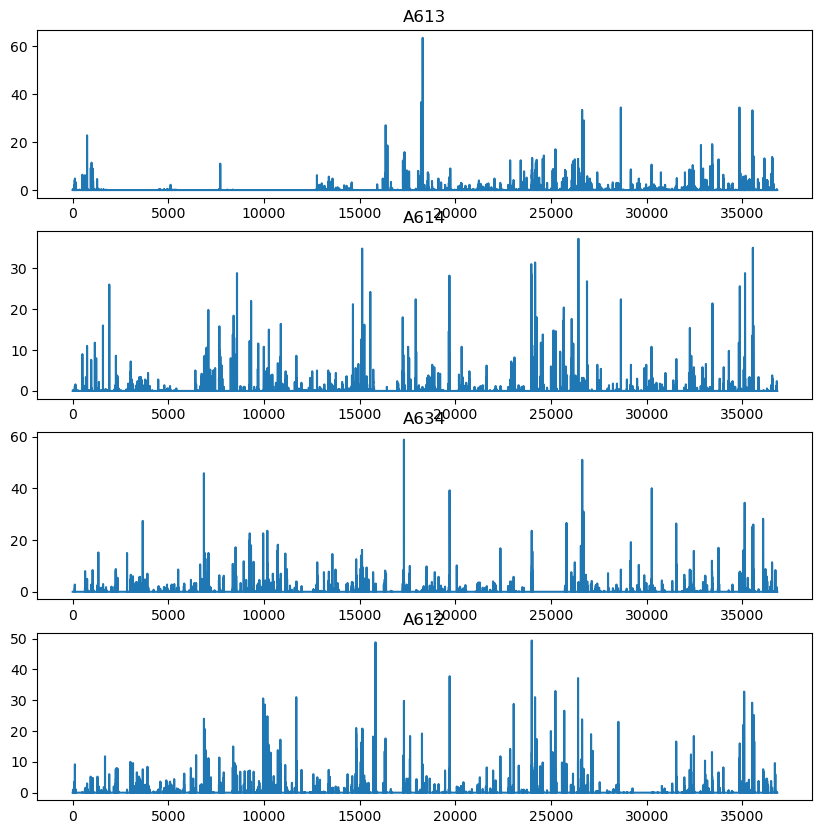

In [72]:
_ = fit.plot()